In [1]:
"""
生体医工学可視化（BarChart）
requirements:
 pip install pandas janome nlpplot matplotlib plotly
"""
import pandas as pd
import nlplot
import pandas as pd
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt

from pprint import pprint

In [2]:
file_path = "datasets/生体医工学会論文5755件.csv"
df = pd.read_csv(file_path,encoding='utf-8')
df.head()

,No,Title,Author,Journal,Vol,No.1,Pages,Published_Year
0,0,リレー随筆他,NaN,生体医工学,43,4,800-802,2005
1,1,高齢者の使用を考慮した引戸の操作性の計測・評価のための実物大実験装置の開発と評価,"田中 眞二, 前川 陽, 奥野 竜平, 赤澤 堅造",生体医工学,43,4,795-799,2005
2,2,足指マウス開発にむけての基礎的検討―母指の運動特性―,"田中 則子, 上田 知生, 中尾 恵, 佐藤 哲大, 湊 小太郎, 吉田 正樹, 纐纈 和美",生体医工学,43,4,790-794,2005
3,3,血液検査用マイクロ流体デバイスの作製,"寺田 信幸, 山田 博之, 吉田 善一",生体医工学,43,4,785-789,2005
4,4,複数皮質活動の動的イメージングのためのfMRI-MEG統合解析法,"隠浪 康行, 小林 哲生, 鄭 址旭, 大橋 俊平, 濱田 昌司, 長峯 隆, 福山 秀直,...",生体医工学,43,4,777-784,2005


In [3]:
df["Published_Year"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [4]:
years= df["Published_Year"].unique().tolist()
n_years = len(years) # 19年間
print(n_years)

19


In [5]:
y1, y2 = 2005, 2006
df1 = df[(df['Published_Year']>=y1) & (df['Published_Year']<=y2)]
titles =  df1.loc[:,['Title']].values
pprint(titles[:10])

array([['リレー随筆他'],
       ['高齢者の使用を考慮した引戸の操作性の計測・評価のための実物大実験装置の開発と評価'],
       ['足指マウス開発にむけての基礎的検討―母指の運動特性―'],
       ['血液検査用マイクロ流体デバイスの作製'],
       ['複数皮質活動の動的イメージングのためのfMRI-MEG統合解析法'],
       ['低侵襲心臓外科手術用リアルタイム三次元超音波Integral Videography'],
       ['業務スケジューリングからみた看護業務属性の検討'],
       ['指タップ加速度計側システムの開発とパーキンソン病診断支援への応用'],
       ['パラレルワイヤ駆動システムと繰返し学習制御を用いた生体部位の他動的軌道追従の実験的検証'],
       ['LAMP法と導電性中空糸膜を利用したウイルス検査法におけるウシ血清個体差の影響']], dtype=object)


In [6]:
import re
from collections import defaultdict

from termextract import LRValue
from termextract.preprocessing import MeCabTokenizer

In [7]:
tok = MeCabTokenizer() 
ignores = ['研究','開発','検討','試作','提案','紹介','展望','事例','課題',"および", "評価","随筆"]
ignores1 = ['型']
ignores2 = ['中','的','時','システム','用']

compound_nouns = []
for [sentence] in titles:
    if sentence.isascii():
        continue 

    tokens = tok.iter_token(sentence)
    nouns = tok.extract_nouns(tokens)
    # print(nouns)
    nouns = tok.filter_nouns(nouns, n=1, stopwords=ignores, stopwords_begin=ignores1, stopwords_end=ignores2)
    # print(nouns)
    if len(nouns) > 0 :
        compound_nouns.extend(nouns)

lr = LRValue()
lr_values = lr.fit(compound_nouns).transform(compound_nouns, mode=3)
print(lr_values['超音波'])
freq = lr.compound_noun
words = [(''.join(w.split()),v) for w, v in freq.items() if len(w.split())<3]
words.sort(key=lambda x: x[1], reverse=True)
words[:10]

8.48528137423857


[('影響', 6),
 ('利用', 5),
 ('立場', 5),
 ('超音波', 5),
 ('個人認証', 5),
 ('応用', 4),
 ('バイオメトリクス', 3),
 ('クリニカルバイオインフォマティクス', 3),
 ('高齢者', 2),
 ('考慮', 2)]

In [8]:
targets = ['超音波','放射線','画像','細胞','生体','血管']
target_freq = defaultdict(int)
target_item = defaultdict(list)
for w, c in freq.items():
    for k in targets:
        if re.match(r'.*'+str(k), w):
            target_freq[k] += 1
            target_item[k] += [w]

pprint(list(target_freq.items()))
pprint(list(target_item.items()))

[('超音波', 11), ('生体', 15), ('血管', 9), ('細胞', 5), ('画像', 12)]
[('超音波',
  ['低 侵襲 心臓 外科 手術 用 リアルタイム 三次元 超音波 Integral Videography',
   '超音波 モータ',
   'MR ガイド 下 集束 超音波',
   '前方 視 超音波 イメージャー',
   '斜 角 入射 型 超音波 プローブ',
   '超音波',
   'パルス 超音波',
   '超音波 造影剤',
   '経 頭蓋 超音波 脳血栓 溶解 療法',
   '超音波 断層 像',
   '遠隔 超音波 診断']),
 ('生体',
  ['生体 部位',
   '生体 インピーダンス',
   '生体 内 水分 量',
   '生体 レーザ アブレーション',
   '生体 外 実験 用 毛細血管 モデル 作製 法',
   '生体 軟 組織',
   '日本 生体 医 工 学会',
   '生体',
   '生体 安全性',
   '自律神経系 生体 情報',
   '生体 特徴',
   '生体 特徴 計測',
   '無 侵襲 生体物質 光 計測',
   '生体 医 工学 シンポジウム 2006',
   '生体 アパタイト 結晶']),
 ('血管',
  ['人工 毛細血管',
   '生体 外 実験 用 毛細血管 モデル 作製 法',
   '血管 内 低 侵襲 治療',
   '冠動脈 血管 内視鏡',
   '血管 内実',
   '血管 壁',
   '血管 内 エコー 法',
   '新しい 血管',
   '血管 内 光学 診断']),
 ('細胞',
  ['心筋 細胞 活動電位 数値計算 モデル', '心筋 細胞 活動電位 シミュレーション', '軟骨 細胞', '骨芽細胞 分化', '骨細胞']),
 ('画像',
  ['自己 参照 型 温度 分布 画像 化 法',
   '磁気 共鳴 画像',
   '近 赤 外 分光 画像 計測 法',
   '大腿骨 CT 画像',
   '脳 PET 画像',
   'DR 画像診断',
   '類似 差分 画像',
   '類似画像 検索システム',
   '3次元 MR 顕微鏡 画像 群',
   'ヒ

In [13]:
delta = 2  
n_div = n_years / delta
m_div = n_years % delta
targets = ['計測','脳','画像','細胞','生体','血管']
df2 = pd.DataFrame(columns=['Year'] + targets)

for y in range(m_div, n_years, delta):
    
    z = y + delta
    z = z - 1 if z - 1 < n_years else n_years-1     

    df1 = df[(df['Published_Year']>=years[y]) & (df['Published_Year']<=years[z])]
    titles =  df1.loc[:,['Title']].values
    
    compound_nouns = []
    for [sentence] in titles:
        if sentence.isascii():
            continue 
    
        tokens = tok.iter_token(sentence)
        nouns = tok.extract_nouns(tokens)
        # print(nouns)
        nouns = tok.filter_nouns(nouns, n=1, stopwords=ignores, stopwords_begin=ignores1, stopwords_end=ignores2)
        # print(nouns)
        if len(nouns) > 0 :
            compound_nouns.extend(nouns)
   
    lr = LRValue()
    lr_values = lr.fit(compound_nouns).transform(compound_nouns, mode=3)
    freq = lr.compound_noun
   
    target_freq = defaultdict(int)
    target_item = defaultdict(list)
    for w, c in freq.items():
        for k in targets:
            if re.match(r'.*'+str(k), w):
                target_freq[k] += 1
                target_item[k] += [w]
                
    print(years[y], years[z])
    # pprint(list(target_freq.items()))
    new_row = {'Year': years[y]}
    for wd in targets:
        new_row[wd] = target_freq[wd]
        
    df2 = pd.concat([df2, pd.DataFrame([new_row])], ignore_index=True)
    pprint(new_row)

df2

2006 2007
{'Year': 2006, '生体': 10, '画像': 10, '細胞': 4, '脳': 10, '血管': 3, '計測': 10}
2008 2009
{'Year': 2008, '生体': 12, '画像': 9, '細胞': 21, '脳': 17, '血管': 9, '計測': 12}
2010 2011
{'Year': 2010, '生体': 17, '画像': 19, '細胞': 5, '脳': 7, '血管': 4, '計測': 12}
2012 2013
{'Year': 2012, '生体': 11, '画像': 3, '細胞': 11, '脳': 13, '血管': 4, '計測': 16}
2014 2015
{'Year': 2014, '生体': 28, '画像': 32, '細胞': 60, '脳': 47, '血管': 33, '計測': 57}
2016 2017
{'Year': 2016, '生体': 35, '画像': 25, '細胞': 69, '脳': 39, '血管': 24, '計測': 68}


/tmp/working/notebooks/theme_river/termextract/termextract.py:53: RuntimeWarning:

invalid value encountered in power



2018 2019
{'Year': 2018, '生体': 45, '画像': 23, '細胞': 65, '脳': 59, '血管': 31, '計測': 73}
2020 2021
{'Year': 2020, '生体': 33, '画像': 34, '細胞': 57, '脳': 56, '血管': 34, '計測': 53}
2022 2023
{'Year': 2022, '生体': 34, '画像': 52, '細胞': 48, '脳': 43, '血管': 37, '計測': 45}


,Year,計測,脳,画像,細胞,生体,血管
0,2006,10,10,10,4,10,3
1,2008,12,17,9,21,12,9
2,2010,12,7,19,5,17,4
3,2012,16,13,3,11,11,4
4,2014,57,47,32,60,28,33
5,2016,68,39,25,69,35,24
6,2018,73,59,23,65,45,31
7,2020,53,56,34,57,33,34
8,2022,45,43,52,48,34,37


In [14]:
df3 = df2.set_index('Year')

In [15]:
df3

,計測,脳,画像,細胞,生体,血管
Year,,,,,,
2006,10,10,10,4,10,3
2008,12,17,9,21,12,9
2010,12,7,19,5,17,4
2012,16,13,3,11,11,4
2014,57,47,32,60,28,33
2016,68,39,25,69,35,24
2018,73,59,23,65,45,31
2020,53,56,34,57,33,34
2022,45,43,52,48,34,37


<Axes: xlabel='Year'>

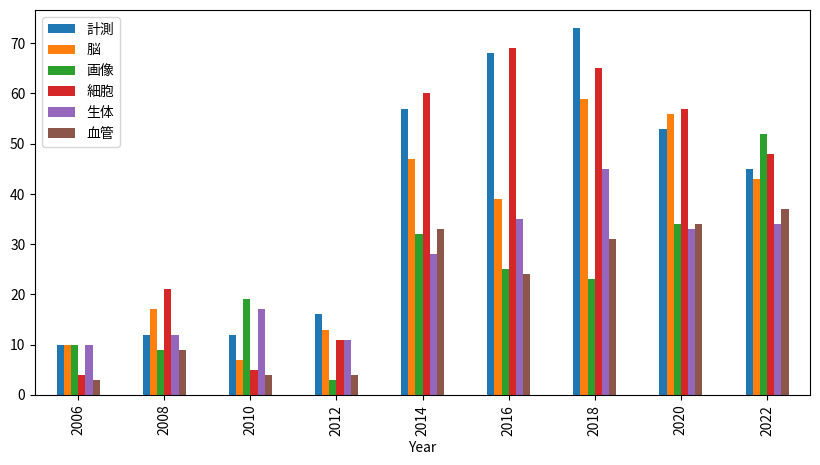

In [16]:
plt.rcParams['font.family'] = "Noto Sans CJK JP"
df3.plot.bar(figsize = (10, 5))